# EOSC510: Assignment 2
## Henry Crawford
### 14 October 2021

###### Question 1

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

In [2]:
# load data & inspect
data = pd.read_csv('PCA.csv')
print(data.head())
print(np.shape(data))

         x1        x2        x3        x4
0  2.275510 -0.434774 -1.628550 -2.098426
1  0.192274  2.166921 -3.657124 -0.795521
2 -0.040727  0.222141 -0.578366 -0.028201
3 -0.005587 -1.772820  3.175823 -0.727236
4 -1.408468 -0.321530  2.055957  2.027777
(40, 4)


In [3]:
#normalize data and check it out
data_norm = (data - data.mean())/data.std()
data_norm.head()

,x1,x2,x3,x4
0,2.054100,-0.416833,-0.640717,-1.130501
1,0.035178,1.840631,-1.503714,-0.388076
2,-0.190631,0.153166,-0.193946,0.049160
3,-0.156576,-1.577842,1.403164,-0.349166
4,-1.516147,-0.318572,0.926750,1.220702


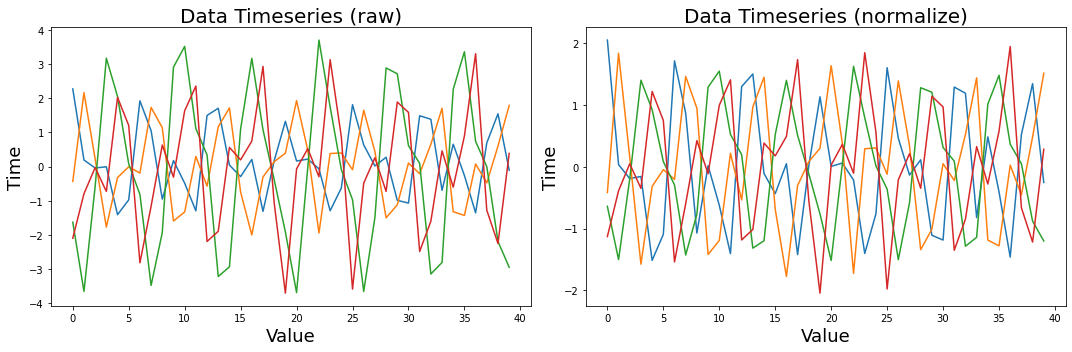

In [4]:
plt.figure(figsize=(15,5))

#raw
plt.subplot(1,2,1)
plt.plot(data)
plt.xlabel('Value', fontsize  = 18)
plt.ylabel('Time', fontsize  = 18)
plt.title('Data Timeseries (raw)', fontsize  = 20)


# normalized
plt.subplot(1,2,2)
plt.plot(data_norm)
plt.xlabel('Value', fontsize  = 18)
plt.ylabel('Time', fontsize  = 18)
plt.title('Data Timeseries (normalize)', fontsize  = 20)

plt.tight_layout()
plt.show()

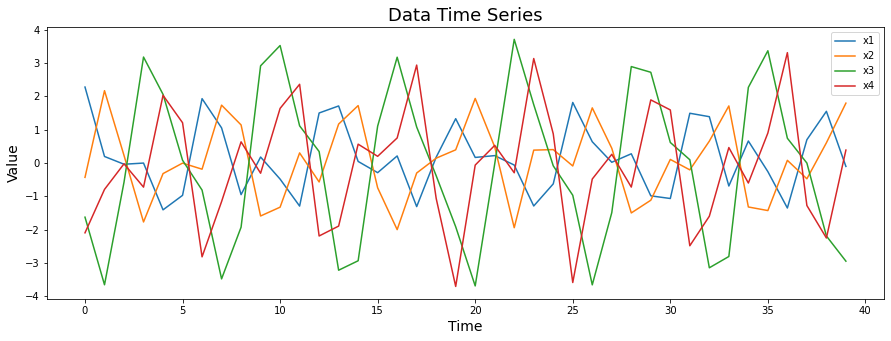

In [5]:
# normalized

data_norm = data

plt.figure(figsize=(15,5))
#plt.axhline(y=0, color='black', linestyle='--', linewidth = 0.5)
plt.plot(data_norm, label = ('x1','x2', 'x3', 'x4'))
plt.xlabel('Time', fontsize  = 14)
plt.ylabel('Value', fontsize  = 14)
plt.title('Data Time Series', fontsize  = 18)
plt.legend()

plt.show()

### Figure 1. Time series data from 'PCA.csv'. 

In [6]:

n_modes = np.shape(data_norm)[1] #dimension of input = 100, so want 100 modes
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data_norm)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

<Figure size 432x288 with 0 Axes>

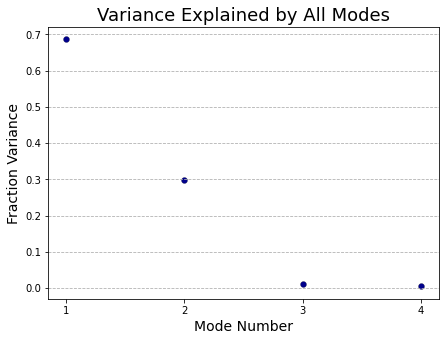

In [7]:
#plot fraction of variance explained by each mode
from matplotlib.ticker import MaxNLocator

mode_count = 1,2,3,4

plt.figure()
ax = plt.figure(figsize=(7,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.grid(linestyle = '--', axis = 'y')
plt.scatter(mode_count,fracVar, c = 'darkblue', edgecolor ='black', linewidth = 0.2)
plt.xlabel('Mode Number', fontsize = 14)
plt.ylabel('Fraction Variance', fontsize = 14)
plt.title('Variance Explained by All Modes', fontsize = 18)

plt.show()


### Figure 2. Plot of variance explained by each of the four modes.

#### The first two modes will be kept. Together, these two modes account for **98.5%** of the total variance as seen in Figure 2. 

In [8]:
# total var explaine by first 2 modes
var_exp = round((fracVar[0] + fracVar[1]), 3)
var_exp

0.985

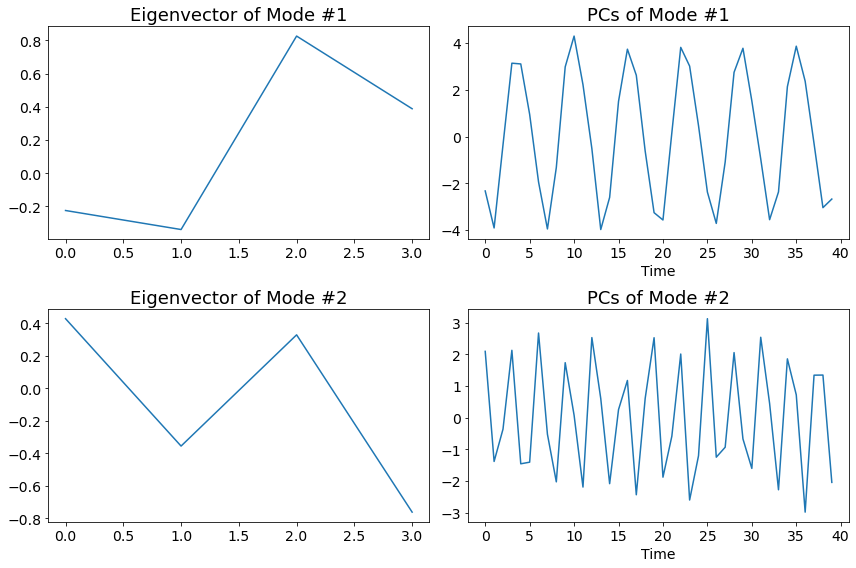

In [9]:
#plot the first n modes and PCs
n = 2

plt.figure(figsize=(12,4*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    plt.plot(eigvecs[kk,:])
    plt.title('Eigenvector of Mode #' + str(kk+1), fontsize = 18)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1), fontsize = 18)
    plt.xlabel('Time', fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    
    plt.tight_layout()
    
    
plt.show()

### Figure 3. PC plots of the two *'significant'* modes. 

#### The PCs of both mode #1 and mode #2 do not show any obvious long term trends over the time series, howevevr they both show oscillations. The PCs of mode #1 ocsillate with a wavelength of ~6 time units with the maginitude of each cycle being relativly consistant over time. The PCs of mode #2 oscillate more frequently with a wavelength of ~3 time units with slighly more variation in magnitude between cycles.  

In [10]:
### Remember that our eigenvectors should be orthogonal and timeseries should be uncorrelated
### Let's check that. Two vectors are orthogonal if their dot product is zero
print(np.dot(eigvecs[0,:],eigvecs[1,:]))
print(np.dot(eigvecs[1,:],eigvecs[2,:]))
print(np.dot(eigvecs[2,:],eigvecs[0,:]))

-9.71445146547012e-17
0.0
-1.3877787807814457e-17


In [11]:
### Similarly, we can check the covariance between the timeseries (should be 0)
print(np.cov(PCs[:,0],PCs[:,1])[0,1])
print(np.cov(PCs[:,1],PCs[:,2])[0,1])
print(np.cov(PCs[:,2],PCs[:,0])[0,1])

-3.158018141791952e-16
7.321003340706086e-17
5.143089580570501e-17


In [12]:
#reconstruct data from PCs and eigenvectors
#y(t) - mean(y(t)) = sum(PC_j(t)*e_j)

#find mean for each y
mean_y = np.mean(data_norm,axis=1)

### reconstruct!
y_rec = np.array([PCs[jj,0]*eigvecs[0] + PCs[jj,1]*eigvecs[1] + mean_y[jj] for jj in range(40)])

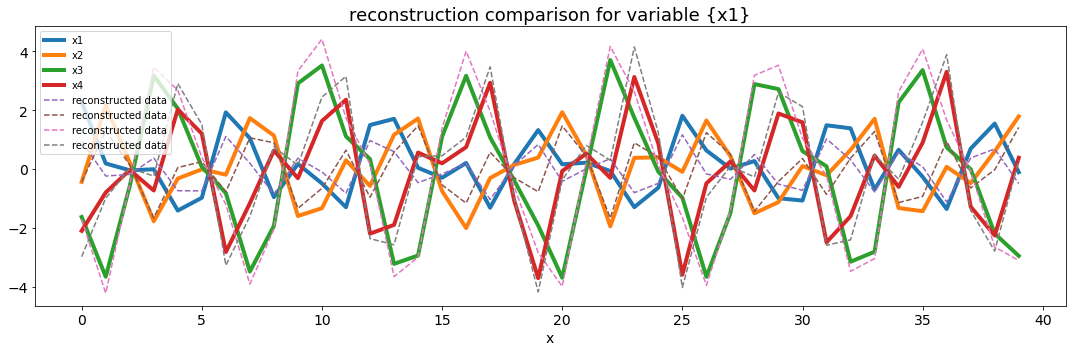

In [13]:
#compare reconstruction with original data to confirm similarity
### ! need to fix to map colors to be the same for og vs reconstructed...

plt.figure(figsize=(15,5))

labs1 = ('x1', 'x2', 'x3', 'x4')

plt.plot(data_norm, linewidth=4, label = labs1)

plt.plot(y_rec, label = 'reconstructed data', linestyle='--')

plt.xlabel('x', fontsize = 14)
plt.title('reconstruction comparison for variable {x1}', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend()
    
plt.tight_layout()

plt.show()

In [14]:
Nobs = len(PCs)

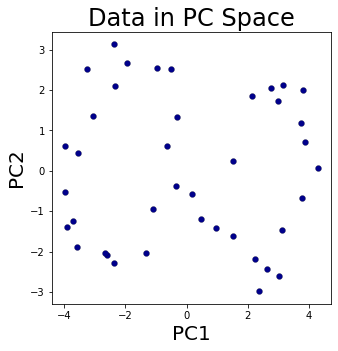

In [15]:
#plot PC1 vs PC2 

plt.figure(figsize=(5,5))
plt.scatter(PCs[:,0],PCs[:,1], c = 'darkblue', edgecolor ='black', linewidth = 0.2)
plt.xlabel('PC1', fontsize = 20)
plt.ylabel('PC2', fontsize = 20)
plt.title('Data in PC Space', fontsize = 24)

plt.show()

### Figure 4. Data plotted in PC space of the first two modes. 

## Question 2

In [16]:
# load data & inspect
data_raw = pd.read_csv('Temp_data.csv')
print(data_raw.head())
print(np.shape(data_raw))

# transpose data 
data = data_raw.T # transpose data
years = data.iloc[0]
data.columns = data.iloc[0] # identify row to become header
data = data[1:] #data selction to incude under header
print(data.head())
print(np.shape(data))

      N      1      2     3      4     5     6     7      8      9  ...  \
0   Lon -115.1 -115.8 -60.4 -115.8 -71.0 -79.4 -79.9 -121.5 -126.7  ...   
1   Lat   67.8   60.8  53.3   49.6  48.3  45.1  47.7   53.1   52.4  ...   
2  1951  -10.8   -5.0   0.6    3.9   2.4   5.0   2.0    2.0    6.4  ...   
3  1952  -10.8   -2.1   1.4    5.5   3.1   5.7   2.9    2.0    6.7  ...   
4  1953   -9.8   -2.1   0.3    5.1   3.6   6.3   3.7    2.3    7.8  ...   

      19    20     21    22    23     24    25     26    27     28  
0 -105.1 -95.0 -130.0 -68.4 -68.5 -120.7 -62.3 -139.1 -61.8 -119.4  
1   69.1  74.7   58.4  58.1  70.5   56.2  82.5   64.1  47.4   76.2  
2  -15.3 -16.1   -2.0  -4.9 -13.5   -0.9 -18.6   -6.8   5.8  -17.0  
3  -14.2 -15.1   -0.6  -4.0 -13.8    2.2 -17.5   -4.6   5.5  -17.0  
4  -14.4 -16.1   -0.3  -4.8 -14.0    2.3 -16.8   -5.3   5.6  -17.4  

[5 rows x 29 columns]
(52, 29)
N    Lon   Lat  1951  1952 1953  1954  1955  1956  1957  1958  ...  1991  \
1 -115.1  67.8 -10.8 -10.8 

In [17]:
#take out lat/lon for plotting
lat = data['Lat']
lon = data['Lon']

data = data.drop(['Lat','Lon'], axis=1)
data.head() #check to see if lat/lon are removed from data

N,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
1,-10.8,-10.8,-9.8,-11.1,-12.1,-12.4,-12.1,-11.5,-12.4,-11.6,...,-11.3,-10.3,-9.8,-9.2,-10.0,-9.6,-9.5,-7.0,-9.0,-9.6
2,-5.0,-2.1,-2.1,-3.4,-4.6,-4.3,-3.8,-2.8,-4.4,-3.8,...,-2.9,-2.7,-1.8,-3.0,-2.8,-3.6,-1.6,-0.1,-0.8,-1.7
3,0.6,1.4,0.3,-0.1,1.4,-0.5,0.0,1.3,0.6,1.6,...,-1.3,-1.5,-1.3,-0.4,-0.1,1.2,-0.4,1.1,1.8,1.2
4,3.9,5.5,5.1,4.7,3.2,5.0,6.0,6.9,4.6,4.9,...,6.0,6.9,4.9,7.2,5.9,4.5,6.1,7.6,6.6,5.5
5,2.4,3.1,3.6,2.5,2.8,1.9,2.7,2.6,2.4,3.3,...,2.9,1.8,2.1,2.4,3.2,3.2,2.3,4.5,4.9,3.0


In [18]:
minYear = np.int(list(data.columns)[0]) #first year of data, turn string into integer
maxYear = np.int(list(data.columns)[-1]) #final year of data

print(minYear)
print(maxYear)

1951
2000


C:\Users\htccr\AppData\Local\Temp/ipykernel_45968/2914953946.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  minYear = np.int(list(data.columns)[0]) #first year of data, turn string into integer
C:\Users\htccr\AppData\Local\Temp/ipykernel_45968/2914953946.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish 

In [19]:
# Transpose data back, now that lat long are removed and headers cleaned. Rows are by time, columns by spatial location
# ! DO NOT RUN MORE THAN ONCE IN A ROW W/O RELOADING ORIGIONAL DATA  i.e. DON't DOUBLE TRANSPOSE...!
data = data.T
print(np.shape(data))
print(data.head())

(50, 28)
         1    2    3    4    5    6    7    8    9   10  ...    19    20   21  \
N                                                        ...                    
1951 -10.8 -5.0  0.6  3.9  2.4  5.0  2.0  2.0  6.4 -0.5  ... -15.3 -16.1 -2.0   
1952 -10.8 -2.1  1.4  5.5  3.1  5.7  2.9  2.0  6.7  2.8  ... -14.2 -15.1 -0.6   
1953  -9.8 -2.1  0.3  5.1  3.6  6.3  3.7  2.3  7.8  1.7  ... -14.4 -16.1 -0.3   
1954 -11.1 -3.4 -0.1  4.7  2.5  5.0  2.3  0.8  6.6  0.7  ... -14.3 -16.0 -1.2   
1955 -12.1 -4.6  1.4  3.2  2.8  5.6  3.1 -0.7  6.0 -0.5  ... -14.8 -16.7 -2.8   

       22    23   24    25   26   27    28  
N                                           
1951 -4.9 -13.5 -0.9 -18.6 -6.8  5.8 -17.0  
1952 -4.0 -13.8  2.2 -17.5 -4.6  5.5 -17.0  
1953 -4.8 -14.0  2.3 -16.8 -5.3  5.6 -17.4  
1954 -4.1 -13.1  0.9 -17.8 -6.1  4.6 -17.7  
1955 -3.4 -12.1 -0.3 -18.2 -6.8  4.7 -18.2  

[5 rows x 28 columns]


In [20]:
# run PCA on the data

n_modes = np.min(np.shape(data))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

In [21]:
# how many modes are needed to explaine >90% of variance
for ii in range(np.shape(fracVar)[0]):
    var_exp = sum(fracVar[0:ii + 1]) # sum of array values from mode 1 (i.e. array place 0) to ii. 
    if var_exp > 0.9:
        print('number of modes:', ii + 1)
        print('total var exp:', var_exp)
        break

number of modes: 8
total var exp: 0.9101891086232115


<Figure size 432x288 with 0 Axes>

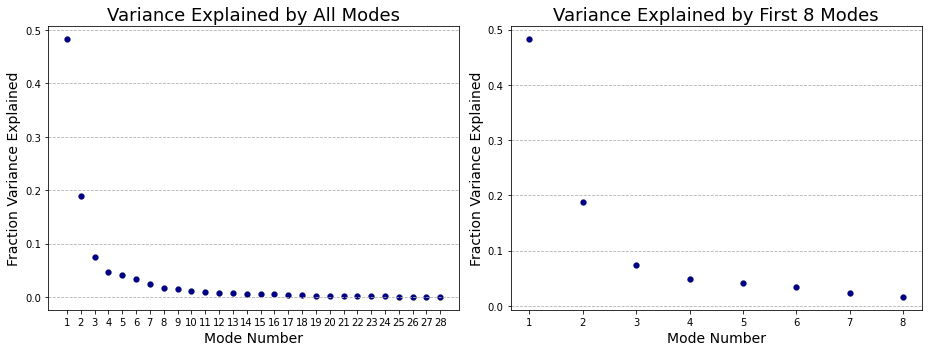

In [22]:
#plot fraction of variance explained by each mode

plt.figure()
ax = plt.figure(figsize=(13,5)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.subplot(1,2,1)
plt.xticks(np.arange(len(fracVar)), np.arange(1, len(fracVar)+1))

plt.grid(linestyle = '--', axis = 'y')
plt.scatter(range(len(fracVar)),fracVar, c = 'darkblue', edgecolor ='black', linewidth = 0.2)
plt.xlabel('Mode Number', fontsize = 14)
plt.ylabel('Fraction Variance Explained', fontsize = 14)
plt.title('Variance Explained by All Modes', fontsize = 18)

plt.subplot(1,2,2)
n_modes_show = 8
plt.xticks(np.arange(len(fracVar)), np.arange(1, len(fracVar)+1))

plt.grid(linestyle = '--', axis = 'y')
plt.scatter(range(n_modes_show),fracVar[:n_modes_show], c = 'darkblue', edgecolor ='black', linewidth = 0.2)
plt.xlabel('Mode Number', fontsize = 14)
plt.ylabel('Fraction Variance Explained', fontsize = 14)
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes', fontsize = 18)

plt.tight_layout()

plt.show()

### Figure 5. Plot of variance explained by each mode (left). Plot of variance explained by the first eight modes, 
### or 91% of the total variance.
#### 1) Keeping the first eight modes would in total explain >90% of variance in the dataset (91%)? 


(45.1, 82.5)

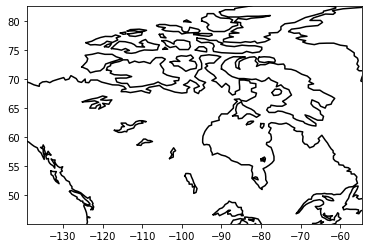

In [23]:
# for coasts (work on this!)

#load coastline data
coasts = pd.read_csv('coastline.csv',header=None)
coastLat = coasts[0]
coastLon = coasts[1]

# find extent

P_extent=[np.min(lon), np.max(lon), np.min(lat), np.max(lat)]  #these are just the known boundaries of the SST grid [lonmin,lonmax,latmin,latmax] for plotting

plt.plot(coastLon,coastLat,c='k')
plt.xlim(P_extent[:2])
plt.ylim(P_extent[2:])


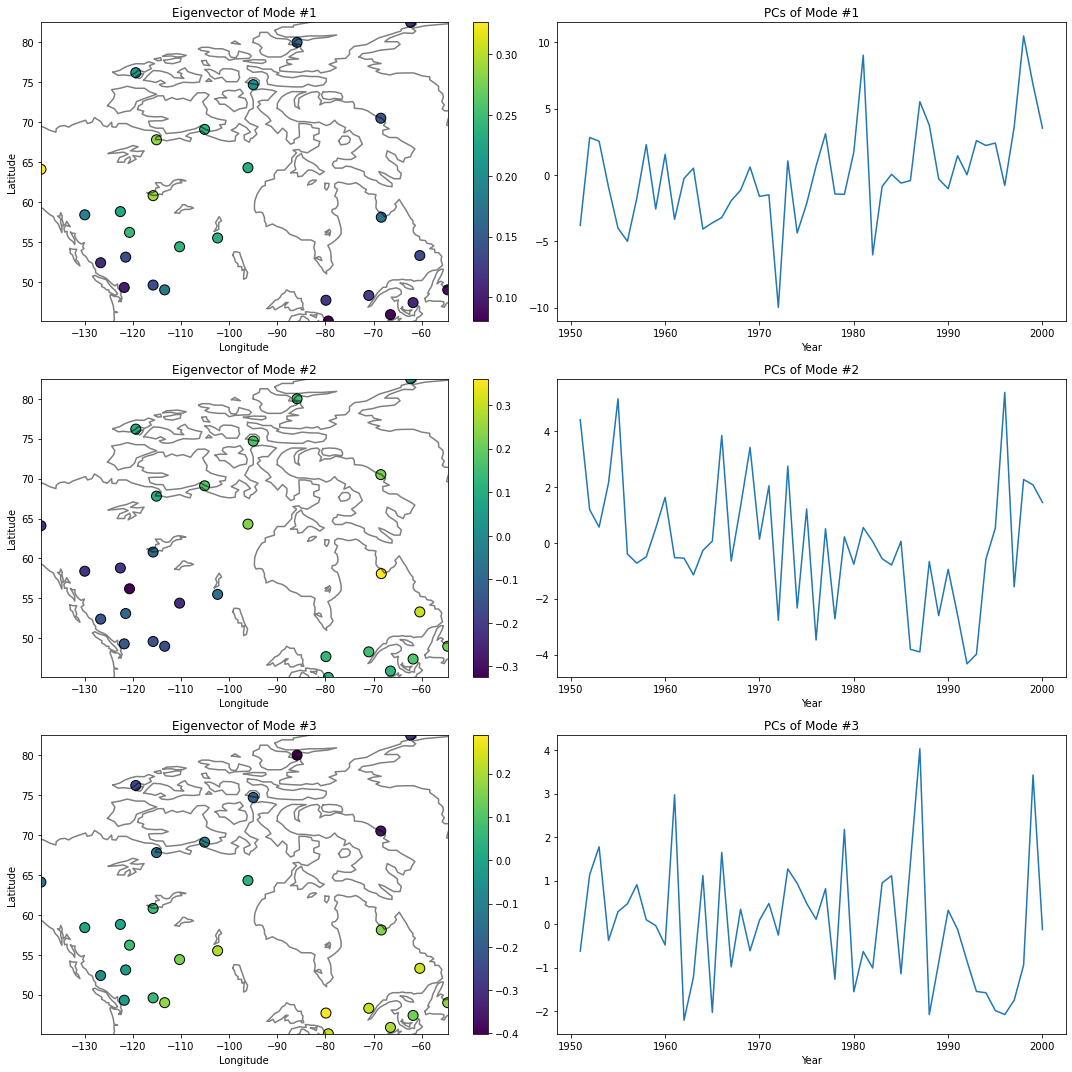

In [38]:
#plot the first n modes and PCs 
#We can express the eigenvector plots as scatter plots on a map.  
#The eigenvectors are showing us the spatial patterns, while the PCs are showing us the temporal patterns

n = 3

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
    
    # coastline
    plt.plot(coastLon, coastLat,'k', alpha = .5)
    plt.xlim(P_extent[:2])
    plt.ylim(P_extent[2:])
    
    # data
    plt.scatter(lon, lat,
            c = eigvecs[kk,:],
            cmap = 'viridis',
            edgecolor='k',
            s = 100,
            alpha = 1)
            #vmin = -0.4,
            #vmax = 0.4)
            
    plt.title('Eigenvector of Mode #' + str(kk+1))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar()
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(range(minYear,maxYear+1),PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Year')
    
    plt.tight_layout()


In [35]:
range(3)

range(0, 3)

### Figure 6. Eigenvectors as scatterplots on a map depicting the spatial patterns of our dataset (left), with the corresponding
### PCs showing temporal patterns (right). *Note the colorbar scale changes between plots

#### 
3. 
a) The eigenvector of mode 1 shows a zone of relativly higher values centered around 65N, 120W, with a general northwest to southeast spatial gradient. 

b) The PCs of mode 1 show a **long term** trend of warming over time, but varibaility in the short term magnitudes of the signal seem to be random and show no short term trends. 

c) The spatial pattern is most pronounced in years 1998, 1981, and 1999, and 1987. The opposite pattern is most pronounced in 1972 and 1982. 


In [42]:
#create dataset that has year as column 1 and PCs as column 2. Find the top 3 max, and the two min years. 
year = list(years[2:52])
PC1 = list(PCs[:,0])

# assign data of lists.  
df = pd.DataFrame(list(zip(year, PC1)),
                  columns =['Year', 'PC1'])

# sort PC1 values
PC1_sorted = df.sort_values(['PC1', 'Year'], ascending=False)
print(PC1_sorted)


    Year        PC1
47  1998  10.476650
30  1981   9.025545
48  1999   6.802028
36  1987   5.527058
37  1988   3.753944
46  1997   3.620348
49  2000   3.525070
26  1977   3.107288
1   1952   2.822356
42  1993   2.586810
2   1953   2.540807
44  1995   2.401718
7   1958   2.286533
43  1994   2.221008
29  1980   1.722078
9   1960   1.549619
40  1991   1.446748
22  1973   1.055592
25  1976   0.666782
18  1969   0.594291
12  1963   0.508993
33  1984   0.045674
41  1992   0.012623
11  1962  -0.263546
38  1989  -0.313110
35  1986  -0.425088
34  1985  -0.613967
45  1996  -0.794028
32  1983  -0.868644
3   1954  -0.928950
39  1990  -1.039315
17  1968  -1.152847
27  1978  -1.436819
28  1979  -1.462316
20  1971  -1.499121
19  1970  -1.617829
6   1957  -1.740771
16  1967  -1.942805
24  1975  -2.163312
8   1959  -2.568107
15  1966  -3.217581
10  1961  -3.350640
14  1965  -3.610733
0   1951  -3.806198
4   1955  -4.003765
13  1964  -4.081031
23  1974  -4.373077
5   1956  -5.004982
31  1982  -6.031115


In [26]:
# first method didnt seem to work well... 
#find mean for each y
#mean_y = np.mean(data,axis=1)

#now, reconstruct using the first n PCs
#n = 3
#y_rec = np.array([sum([PCs[jj,nn]*eigvecs[nn] for nn in range(n)]) + mean_y[jj] for jj in range(50)])

In [27]:
pca = PCA(n_components= 3)
PCs = pca.fit_transform(data)
y_rec = pca.inverse_transform(PCs)

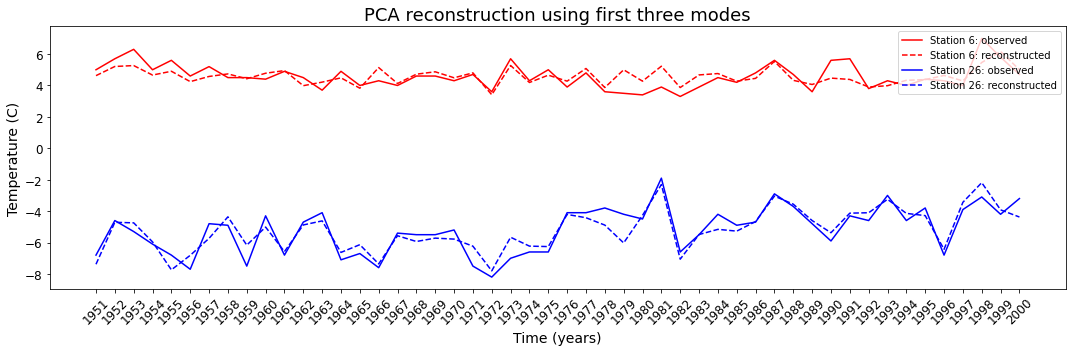

In [28]:

plt.figure(figsize=(15,5))

#site 6 & 26
plt.plot(data['6'], label = "Station 6: observed", linewidth=1.5, color = 'r')
plt.plot(y_rec[:,5], label = "Station 6: reconstructed", linestyle='--', color = 'r')

plt.plot(data['26'], label = "Station 26: observed", linewidth=1.5, color = 'b')
plt.plot(y_rec[:,25], label = "Station 26: reconstructed", linestyle='--', color = 'b') 

plt.xlabel('Time (years)', fontsize = 14)
plt.ylabel('Temperature (C)', fontsize = 14)
plt.title('PCA reconstruction using first three modes', fontsize = 18)
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.legend(loc = 1)
    
plt.tight_layout()

plt.show()

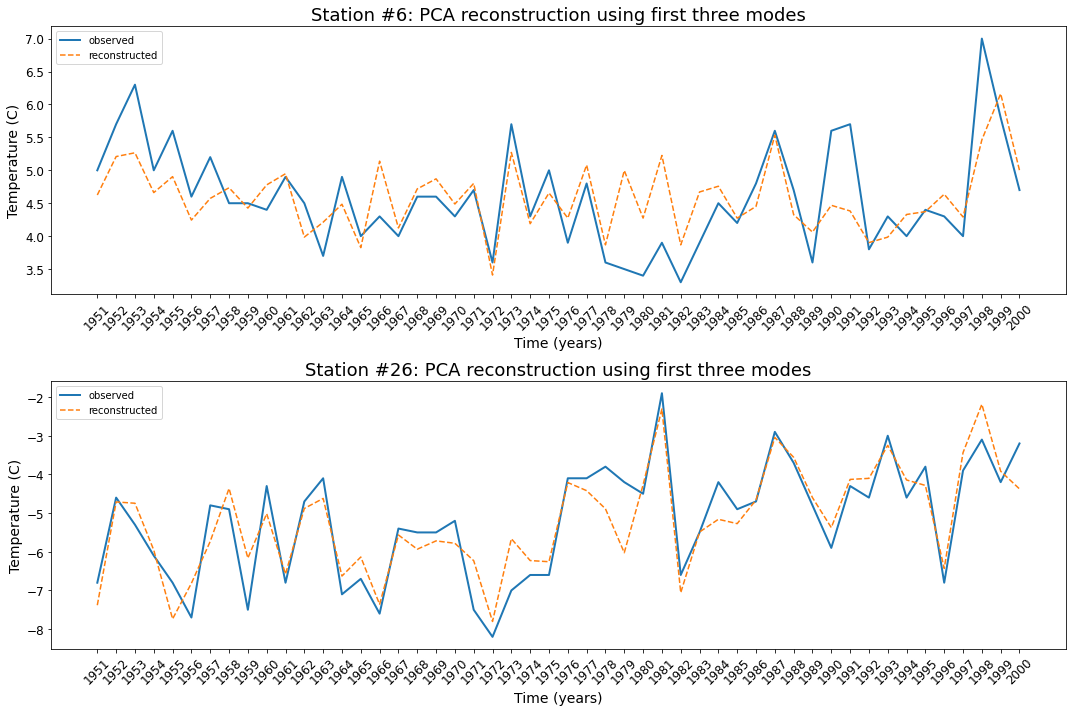

In [29]:
#compare reconstruction with original data to confirm similarity
#reconstruct data from PCs and eigenvectors
#y(t) - mean(y(t)) = sum(PC_j(t)*e_j)


#plot 6
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(data['6'], label = "observed", linewidth=2)
plt.plot(y_rec[:,5], label = "reconstructed", linestyle='--') # add back the mean!!!

plt.xlabel('Time (years)', fontsize = 14)
plt.ylabel('Temperature (C)', fontsize = 14)
plt.title('Station #6: PCA reconstruction using first three modes', fontsize = 18)
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.legend()

#plot 26

plt.subplot(2,1,2)
plt.plot(data['26'], label = "observed", linewidth=2)
plt.plot(y_rec[:,25], label = "reconstructed", linestyle='--') # add back the mean!!!

plt.xlabel('Time (years)', fontsize = 14)
plt.ylabel('Temperature (C)', fontsize = 14)
plt.title('Station #26: PCA reconstruction using first three modes', fontsize = 18)
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.legend()
    
plt.tight_layout()

plt.show()

### Figure 7. Temperature data reconstruction at station #6 (top) and station #26 (bottom). Data is reconstructed
### using the first three PC modes. 

In [30]:
# Pearsons correlation coefficient
y_rec2 = y_rec.astype(float)
data2 = data.astype(float)

r_6 = np.corrcoef(data2['6'], y_rec2[:,5])
r_26 = np.corrcoef(data2['26'], y_rec2[:,25])

print(round(r_6[0,1], 3))
print(round(r_26[0,1], 3))

0.656
0.896


In [31]:
# DONE!

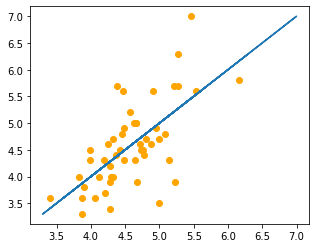

In [32]:
# plot residuals of reconstructed against observed. 
plt.figure(figsize=(5,4))
plt.plot(data['6'],data['6'])
plt.scatter(y_rec[:,5], data['6'], color = 'orange')

resid = y_rec[:,5] - data['6']


In [33]:
# Pearsons correlation coefficient manual calculation

#x_mean = np.mean(data['6'])
#y_mean = np.mean(y_rec[:,5])
#r = sum((data['6'] - x_mean)-(y_rec[:,5])) / ((sum((data['6'] - x_mean)**2))*(sum((y_rec[:,5])**2)))**.5
#r2 = r**2

In [34]:
# turn x and y into np.array and preform np.corrcoef
data_array = np.array(data)
print(data_array[:,5])

y_rec_array = np.array(y_rec)
print(y_rec_array[:,5])

r_6 = np.corrcoef(data_array[:,5], y_rec_array[:,5])
r_26 = np.corrcoef(data_array[:,25], y_rec_array[:,25])

print(round(r_6[0,1], 3))
print(round(r_26[0,1], 3))

[5.0 5.7 6.3 5.0 5.6 4.6 5.2 4.5 4.5 4.4 4.9 4.5 3.7 4.9 4.0 4.3 4.0 4.6
 4.6 4.3 4.7 3.6 5.7 4.3 5.0 3.9 4.8 3.6 3.5 3.4 3.9 3.3 3.9 4.5 4.2 4.8
 5.6 4.7 3.6 5.6 5.7 3.8 4.3 4.0 4.4 4.3 4.0 7.0 5.8 4.7]
[4.6249038  5.20859653 5.26590259 4.66155754 4.9037881  4.24427377
 4.57340022 4.73511011 4.42652314 4.77857623 4.9478371  3.98569704
 4.21214258 4.48477424 3.82590551 5.13871479 4.12475722 4.7173852
 4.87034247 4.48849611 4.80168145 3.40943643 5.27095219 4.18912792
 4.65555754 4.2741081  5.08041567 3.86775804 4.99746593 4.27446635
 5.22531614 3.86790023 4.67087862 4.75806314 4.27338634 4.45201249
 5.53254903 4.32591117 4.06173338 4.46835721 4.38256581 3.90224737
 3.98521791 4.32918459 4.37220926 4.63698866 4.29087626 5.46213489
 6.16311138 4.99970223]


AttributeError: 'float' object has no attribute 'shape'

In [ ]:
# examine shape error...
print(type(data_array))
print(type(y_rec_array))

print(np.shape(data_array))
print(np.shape(y_rec_array))